In [43]:
#Constructing Neural Network Model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pt

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.input = torch.nn.Linear(1, 10)
        self.hidden1 = torch.nn.Linear(10, 30)
        self.hidden2 = torch.nn.Linear(30, 30)
        self.hidden3 = torch.nn.Linear(30, 30)
        self.output = torch.nn.Linear(30, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x
    
model_1 = Model()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
loss = nn.MSELoss()
print(f'Number of parameters in Model: {sum(p.numel() for p in model_1.parameters())}')

Number of parameters in Model: 2241


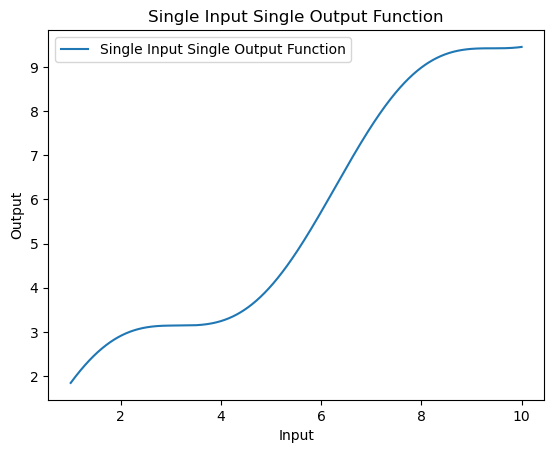

In [44]:
def single_input_single_output(x):
    return np.sin(x) + x

x_train = np.linspace(1,10,100000).reshape(100000, 1)
y_train = single_input_single_output(x_train)

x_actual = np.linspace(1,10,50000).reshape(50000, 1)
y_actual = single_input_single_output(x_actual)

#converting arrays to tensors
x_train, y_train = torch.FloatTensor(x_train), torch.FloatTensor(y_train)
x_actual, y_actual = torch.FloatTensor(x_actual), torch.FloatTensor(y_actual)

pt.plot(x_actual, y_actual, label="Single Input Single Output Function")
pt.title("Single Input Single Output Function")
pt.xlabel("Input")
pt.ylabel("Output")
pt.legend()
pt.show()

In [45]:
def train_model(model, optimizer, x_train, y_train):
    model.train()
    loss_arr, gradient_arr, epoch_arr = [], [], []
    old_loss = torch.inf
    epoch = 0
    max_epochs = 20000
    
    while epoch < max_epochs:
        optimizer.zero_grad()
        outputs = model(x_train)
        criterion = loss(outputs, y_train)
        criterion.backward()
        optimizer.step()
        
        epoch_arr.append(epoch)
        loss_arr.append(criterion.detach().numpy())
        
        gradient_all = 0.0
        for param in model.parameters():
            gradient = 0.0
            if param.grad is not None:
                gradient = param.grad.data.norm(2)
                gradient_all += gradient.item() ** 2
        gradient_norm = gradient_all ** 0.5
        
        gradient_arr.append(gradient_norm)
        
        if epoch%100 == 0:
            print(f'Epoch: {epoch}, Loss: {criterion.item():.3f}')
            
        if epoch > 0 and abs(old_loss - criterion.item()) < 1e-5:
            print(f'Convergence reached at epoch: {epoch} with loss: {criterion.item()}')
            break
            
        old_loss = criterion.item()
        epoch += 1
        
    return loss_arr, gradient_arr, epoch_arr

model_losses, model_gradient, model_epoch = train_model(model_1, optimizer, x_train, y_train)
epochs = range(len(model_gradient))

Epoch: 0, Loss: 41.419
Epoch: 100, Loss: 0.517
Epoch: 200, Loss: 0.482
Epoch: 300, Loss: 0.453
Epoch: 400, Loss: 0.417
Epoch: 500, Loss: 0.361
Epoch: 600, Loss: 0.309
Epoch: 700, Loss: 0.268
Epoch: 800, Loss: 0.236
Epoch: 900, Loss: 0.216
Epoch: 1000, Loss: 0.206
Epoch: 1100, Loss: 0.202
Convergence reached at epoch: 1171 with loss: 0.2004525065422058


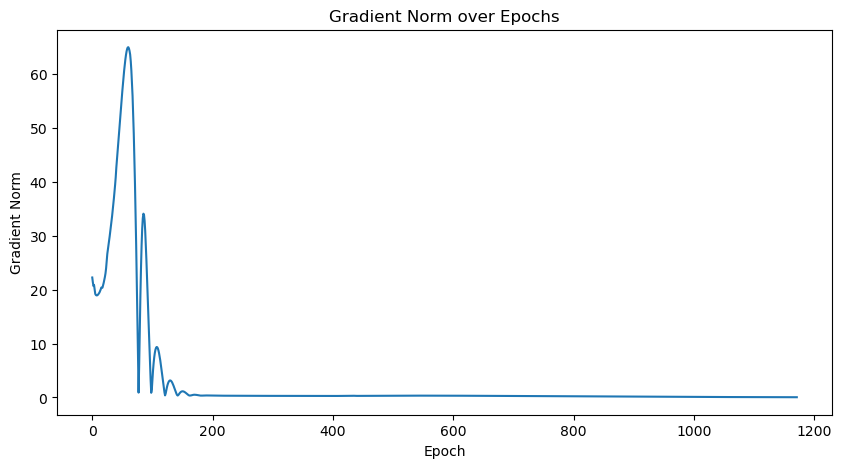

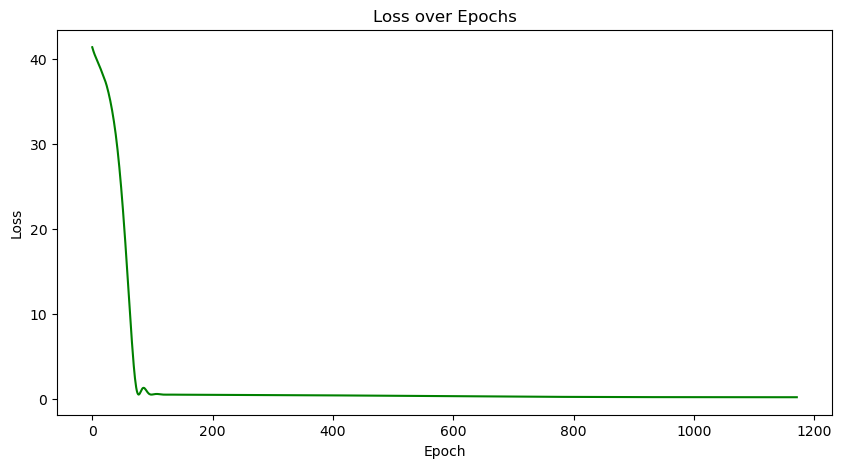

In [48]:
pt.figure(figsize=(10, 5))
pt.plot(epochs, model_gradient)
pt.title('Gradient Norm over Epochs')
pt.xlabel('Epoch')
pt.ylabel('Gradient Norm')

pt.figure(figsize=(10, 5))
pt.plot(epochs, model_losses, color='green')
pt.title('Loss over Epochs')
pt.xlabel('Epoch')
pt.ylabel('Loss')

pt.show()